In [179]:
import json
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import sqlite3
import nltk
import spacy
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import umap
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

In [4]:
df2 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_review.json', lines = True)

In [5]:
df3 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_business.json', lines = True)

In [6]:
df4 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json', lines = True)

In [7]:
df5 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_tip.json', lines = True)

In [8]:
df6 = pd.read_json('/Users/robholmstrom/Downloads/yelp_dataset/yelp_academic_dataset_user.json', lines = True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 550.8+ MB


In [10]:
review_by_year = df2.date.dt.year.value_counts()

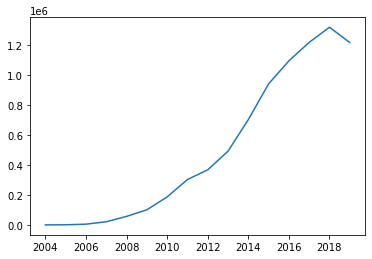

In [11]:
sns.lineplot(review_by_year.index,review_by_year.values )

In [12]:
df2['year'] = df2.date.dt.year
df2['month'] = df2.date.dt.month_name
df2['weekday'] = df2.date.dt.day_name
df2['hour'] = df2.date.dt.hour

In [13]:
df2_3yrs = df2[df2['year'].isin([2017, 2018, 2019])]
df2_3yrs['year'].value_counts()

2018    1318054
2017    1217292
2019    1215836
Name: year, dtype: int64

In [14]:
df2_3yrs.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,weekday,hour
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,2017,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,21
7,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,5,0,0,0,"Awesome office and staff, very professional an...",2017-07-18 18:31:54,2017,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,18
15,mjbs5CL4eMu4o6_VtYhN3Q,TF4C-F5iqavACQgKTrbjRA,7Ka9Pd8X9SRHs1D5EcleLg,1,0,0,0,"If I could give less than one star, that would...",2017-08-07 21:36:36,2017,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,21
17,Ne_2CSfcKIqXHmv_KC0uqg,6sJN_HlM_uwpfLJ1puf1Fg,oVuZtlCFg_zF090Nhtp0Ow,4,3,0,1,A close friend was in town and so instead of t...,2018-02-01 19:15:00,2018,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,19
18,Hy-gUXQh3RVhE8FLH9Dt4Q,kMkWON2lmw0s-M-fwiuByg,_iGvLfEsqDwPUxRUAe6tUw,1,0,0,0,Tried to have my car repaired. Even made an a...,2017-06-28 00:39:18,2017,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,0


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [16]:
df3_AZOH = df3[df3['state'].isin(['AZ','OH'])]

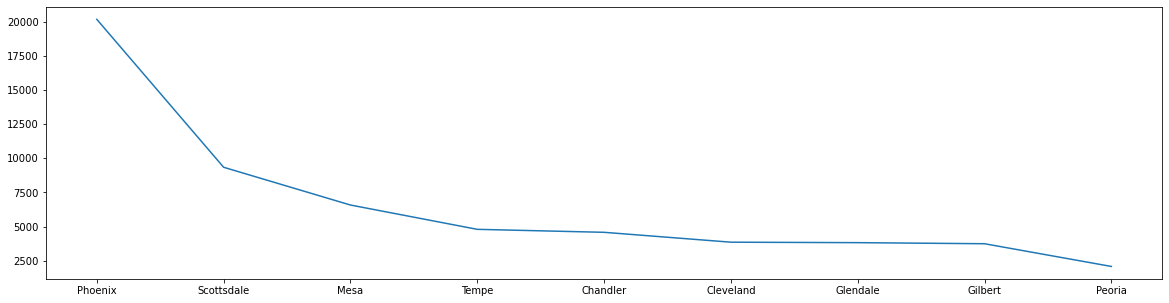

In [18]:
plt.figure(figsize = (20,5))
fig = plt.plot(df3_AZOH.city.value_counts()[df3_AZOH.city.value_counts()>2000])

plt.show()

In [19]:
df2_3yrs['business_id'].unique()

array(['IS4cv902ykd8wj1TR0N3-A', 'FNCJpSn0tL9iqoY3JC73qw',
       '7Ka9Pd8X9SRHs1D5EcleLg', ..., 'FzFaVBhnLcJX9YmYEK4E4A',
       'toeybd1t5BMvp9nAyIEqng', 'xzpWh6VxRE6Iov2hlHr4ZA'], dtype=object)

In [23]:
df3_v1 = df3_AZOH[df3_AZOH['business_id'].isin(df2_3yrs['business_id'].unique())]

In [24]:
# df3_v1['stars'] =  
df2_select_mean = pd.DataFrame(df2_3yrs.groupby('business_id')['stars'].mean())

In [25]:
df2_select_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173938 entries, --1UhMGODdWsrMastO9DZw to zzwicjPC9g246MK2M1ZFBA
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   stars   173938 non-null  float64
dtypes: float64(1)
memory usage: 2.7+ MB


In [26]:
# planned_final.loc[planned_final["WorkShift"] == '1', "Crew"] = "A"

# df_1.loc[df_1["WorkShift"] == '1', "Crew"] = "A"

In [240]:
df3_v1 = df3_v1.merge(df2_select_mean, on='business_id').drop('stars_x', axis=1)
df3_v1['stars_avg'] = df3_v1['stars_y'].round(0)

KeyError: "['stars_x'] not found in axis"

In [28]:
df3_v1['stars_avg'].value_counts()

4.0    20038
5.0    18595
3.0    13158
2.0     8684
1.0     5131
Name: stars_avg, dtype: int64

In [241]:
df3_v1.shape

(65606, 15)

In [29]:
df3_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65606 entries, 0 to 65605
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   65606 non-null  object 
 1   name          65606 non-null  object 
 2   address       65606 non-null  object 
 3   city          65606 non-null  object 
 4   state         65606 non-null  object 
 5   postal_code   65606 non-null  object 
 6   latitude      65606 non-null  float64
 7   longitude     65606 non-null  float64
 8   review_count  65606 non-null  int64  
 9   is_open       65606 non-null  int64  
 10  attributes    56625 non-null  object 
 11  categories    65415 non-null  object 
 12  hours         55728 non-null  object 
 13  stars_y       65606 non-null  float64
 14  stars_avg     65606 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 8.0+ MB


In [30]:
df3_v2 = df3_v1.copy().drop(['attributes', 'hours', 'stars_y'], axis=1)

In [31]:
df3_v2 = df3_v2[df3_v2['is_open']==1]

In [32]:
df3_v2['categories'].fillna(value=np.nan, inplace = True)

In [33]:
df3_v2.dropna(inplace= True)

In [34]:
df3lite = df3_v2[df3_v2['categories'].str.contains('Restaurant')|
                 df3_v2['categories'].str.contains('Coffee & Tea')]

In [35]:
con = sqlite3.connect('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/sqlite/test.db')


# Write the new DataFrame to a new SQLite table
df3lite.to_sql("df3lite", con, if_exists="replace")
# df4.to_sql("df4", con, if_exists="replace")
# df5.to_sql("df5", con, if_exists="replace")
# df6.to_sql("df6", con, if_exists="replace")
con.close()

In [36]:
[x for x in df3.columns if df3[x].dtype=='float64']

['latitude', 'longitude', 'stars']

In [37]:
df_rest_raw = df3lite.copy()

In [38]:
df_rest_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12927 entries, 9 to 65605
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   12927 non-null  object 
 1   name          12927 non-null  object 
 2   address       12927 non-null  object 
 3   city          12927 non-null  object 
 4   state         12927 non-null  object 
 5   postal_code   12927 non-null  object 
 6   latitude      12927 non-null  float64
 7   longitude     12927 non-null  float64
 8   review_count  12927 non-null  int64  
 9   is_open       12927 non-null  int64  
 10  categories    12927 non-null  object 
 11  stars_avg     12927 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [39]:
food_cats = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/Yelp_food_categories.csv')
food_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Categories   0 non-null      float64
 1   Food_types   69 non-null     object 
 2   Ethnicities  96 non-null     object 
 3   Venue_type   51 non-null     object 
dtypes: float64(1), object(3)
memory usage: 6.9+ KB


In [40]:
food_types = food_cats['Food_types'].dropna().str.strip().str.replace(' ', '')
ethnicities = food_cats['Ethnicities'].dropna().str.strip().str.replace(' ', '')
venue_types = food_cats['Venue_type'].dropna().str.strip().str.replace(' ', '')

In [41]:
cat_list = df_rest_raw['categories'].str.replace(' ', '' ).str.replace(',', ', ')

In [42]:
cat_list

9          Food, Pretzels, Bakeries, FastFood, Restaurants
12                           Restaurants, Vietnamese, Soup
13                          Restaurants, FastFood, Burgers
15       ShoppingCenters, Food, Coffee&Tea, Cafes, Muse...
18       Restaurants, Egyptian, FoodTrucks, Food, Middl...
                               ...                        
65588    Restaurants, Barbeque, ComfortFood, Salad, Eve...
65596    IceCream&FrozenYogurt, Burgers, Restaurants, F...
65600                                 Chinese, Restaurants
65602    Nightlife, American(Traditional), ChickenWings...
65605    American(New), Food, Burgers, Restaurants, Fas...
Name: categories, Length: 12927, dtype: object

In [43]:
cat_list[0:1].str[1:2].values

array(['o'], dtype=object)

In [44]:
df_rest_raw['categories_fixed']=cat_list

In [45]:
df_rest_raw.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,categories,stars_avg,categories_fixed
9,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,10,1,"Food, Pretzels, Bakeries, Fast Food, Restaurants",3.0,"Food, Pretzels, Bakeries, FastFood, Restaurants"
12,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,23,1,"Restaurants, Vietnamese, Soup",4.0,"Restaurants, Vietnamese, Soup"
13,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,7,1,"Restaurants, Fast Food, Burgers",3.0,"Restaurants, FastFood, Burgers"


In [46]:
df_rest_raw['categories_fixed'][0:1]

9    Food, Pretzels, Bakeries, FastFood, Restaurants
Name: categories_fixed, dtype: object

In [47]:
type_list = []

for x in df_rest_raw['categories_fixed']:
    sublist = []
    for i in food_types:
        if i in x:
            sublist.append(i)
    
    if len(sublist) == 0:
        type_list.append(['Undefined'])
    else:
        type_list.append(sublist)  

print(len(type_list))
print(df_rest_raw.shape[0])


12927
12927


In [48]:
venue_list = []

for x in df_rest_raw['categories_fixed']:
    sublist = []
    for i in venue_types:
        if i in x:
            sublist.append(i)
    
    if len(sublist) == 0:
        venue_list.append(['Restaurant'])
    else:
        venue_list.append(sublist)  

print(len(venue_list))
print(df_rest_raw.shape[0])


12927
12927


In [49]:
ethnicity_list = []

for x in df_rest_raw['categories_fixed']:
    sublist = []
    for i in ethnicities:
        if i in x:
            sublist.append(i)
    
    if len(sublist) == 0:
        ethnicity_list.append(['Undefined'])
    else:
        ethnicity_list.append(sublist)  
print(len(ethnicity_list))
print(df_rest_raw.shape[0])


12927
12927


In [50]:
df_rest_raw['food_type'] = type_list
df_rest_raw['ethnicity'] = ethnicity_list
df_rest_raw['venue'] = venue_list


In [51]:
df_rest_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12927 entries, 9 to 65605
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       12927 non-null  object 
 1   name              12927 non-null  object 
 2   address           12927 non-null  object 
 3   city              12927 non-null  object 
 4   state             12927 non-null  object 
 5   postal_code       12927 non-null  object 
 6   latitude          12927 non-null  float64
 7   longitude         12927 non-null  float64
 8   review_count      12927 non-null  int64  
 9   is_open           12927 non-null  int64  
 10  categories        12927 non-null  object 
 11  stars_avg         12927 non-null  float64
 12  categories_fixed  12927 non-null  object 
 13  food_type         12927 non-null  object 
 14  ethnicity         12927 non-null  object 
 15  venue             12927 non-null  object 
dtypes: float64(3), int64(2), object(11)
memo

In [52]:
df_rest_raw

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,categories,stars_avg,categories_fixed,food_type,ethnicity,venue
9,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,10,1,"Food, Pretzels, Bakeries, Fast Food, Restaurants",3.0,"Food, Pretzels, Bakeries, FastFood, Restaurants","[Bakeries, Pretzels, FastFood]",[Undefined],[Restaurant]
12,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,23,1,"Restaurants, Vietnamese, Soup",4.0,"Restaurants, Vietnamese, Soup",[Soup],[Vietnamese],[Restaurant]
13,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,7,1,"Restaurants, Fast Food, Burgers",3.0,"Restaurants, FastFood, Burgers","[Burgers, FastFood]",[Undefined],[Restaurant]
15,lK-wuiq8b1TuU7bfbQZgsg,Hingetown,,Cleveland,OH,44113,41.489343,-81.711029,4,1,"Shopping Centers, Food, Coffee & Tea, Cafes, M...",5.0,"ShoppingCenters, Food, Coffee&Tea, Cafes, Muse...",[Undefined],[Undefined],"[Coffee&Tea, Cafes]"
18,LAoSegVNU4wx4GTA8reB6A,Tzikii Food Truck,7510 S Priest Dr,Tempe,AZ,85283,33.350104,-111.963660,4,1,"Restaurants, Egyptian, Food Trucks, Food, Midd...",3.0,"Restaurants, Egyptian, FoodTrucks, Food, Middl...",[Undefined],"[MiddleEastern, Egyptian]",[FoodTrucks]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65588,8dK-8e006F_it5bNxTVlaQ,Famous Dave's Bar-B-Que,26410 Great Northern Shopping Ctr,North Olmsted,OH,44070,41.418407,-81.915597,120,1,"Restaurants, Barbeque, Comfort Food, Salad, Ev...",4.0,"Restaurants, Barbeque, ComfortFood, Salad, Eve...","[Burgers, ComfortFood, Salad, Sandwiches]","[American(Traditional), Barbeque]",[Restaurant]
65596,_bvc2j6E8mk_ZiMoh2iMuQ,Sonic Drive-In,6501 W Glendale Ave,Glendale,AZ,85301,33.537861,-112.199338,13,1,"Ice Cream & Frozen Yogurt, Burgers, Restaurant...",2.0,"IceCream&FrozenYogurt, Burgers, Restaurants, F...","[IceCream&FrozenYogurt, Burgers, FastFood]",[American(Traditional)],[Restaurant]
65600,cmsAFAymfVoBitSF8R6GKw,Yao Fine Chinese Cuisine,"2487 S Gilbert Rd, Ste 102",Gilbert,AZ,85295,33.304935,-111.788861,230,1,"Chinese, Restaurants",4.0,"Chinese, Restaurants",[Undefined],[Chinese],[Restaurant]
65602,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,-112.221142,106,1,"Nightlife, American (Traditional), Chicken Win...",2.0,"Nightlife, American(Traditional), ChickenWings...",[ChickenWings],[American(Traditional)],[Restaurant]


In [53]:
df_rest_raw['food_comb'] = (df_rest_raw['food_type']+df_rest_raw['ethnicity']+df_rest_raw['venue']).apply(lambda x: ', '.join(x))
df_rest_raw['food_comb'] = df_rest_raw['food_comb'].str.replace('Undefined,', '')


In [54]:
df_rest_raw['food_comb']

9                Bakeries, Pretzels, FastFood,  Restaurant
12                            Soup, Vietnamese, Restaurant
13                          Burgers, FastFood,  Restaurant
15                                       Coffee&Tea, Cafes
18                     MiddleEastern, Egyptian, FoodTrucks
                               ...                        
65588    Burgers, ComfortFood, Salad, Sandwiches, Ameri...
65596    IceCream&FrozenYogurt, Burgers, FastFood, Amer...
65600                                  Chinese, Restaurant
65602      ChickenWings, American(Traditional), Restaurant
65605         Burgers, FastFood, American(New), Restaurant
Name: food_comb, Length: 12927, dtype: object

In [55]:
df_rest = df_rest_raw.drop(columns = ['categories'])
df_rest['food_type'] = df_rest['food_type'].apply(lambda x: ', '.join(x))
df_rest['venue'] = df_rest['venue'].apply(lambda x: ', '.join(x))
df_rest['ethnicity']= df_rest['ethnicity'].apply(lambda x: ', '.join(x))

In [56]:
df_rest.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,stars_avg,categories_fixed,food_type,ethnicity,venue,food_comb
9,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,10,1,3.0,"Food, Pretzels, Bakeries, FastFood, Restaurants","Bakeries, Pretzels, FastFood",Undefined,Restaurant,"Bakeries, Pretzels, FastFood, Restaurant"
12,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,23,1,4.0,"Restaurants, Vietnamese, Soup",Soup,Vietnamese,Restaurant,"Soup, Vietnamese, Restaurant"
13,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,7,1,3.0,"Restaurants, FastFood, Burgers","Burgers, FastFood",Undefined,Restaurant,"Burgers, FastFood, Restaurant"


In [57]:
df_rest['food_type'].value_counts().head(3)

Undefined            4003
Pizza                 790
Burgers, FastFood     623
Name: food_type, dtype: int64

In [58]:
df_rest['ethnicity'].value_counts().head(3)

Undefined                5414
American(Traditional)    1310
Mexican                  1295
Name: ethnicity, dtype: int64

In [59]:
df_rest['venue'].value_counts().head(3)

Restaurant    8397
Coffee&Tea    1221
Delis          334
Name: venue, dtype: int64

In [60]:
df_rest[(df_rest['food_type']=='Undefined')]['ethnicity'].value_counts()

Undefined                                              1069
Mexican                                                 644
American(Traditional)                                   382
Chinese                                                 291
American(New)                                           282
                                                       ... 
American(New), American(Traditional), Mediterranean       1
AsianFusion, Mexican, NewMexicanCuisine                   1
Burmese, Thai                                             1
MiddleEastern, Egyptian                                   1
Arabian, Greek, Mediterranean                             1
Name: ethnicity, Length: 238, dtype: int64

In [61]:
df_rest['food_type'].str.contains('').value_counts()

True    12927
Name: food_type, dtype: int64

In [62]:
df_rest[(df_rest['food_type'] !='Undefined') & (df_rest['ethnicity'] !='Undefined')]['venue'].value_counts().sum()


4579

In [63]:
df_rest[(df_rest['food_type']=='Undefined') & (df_rest['ethnicity']=='Undefined')]['venue'].value_counts().sum()

1069

In [64]:
['Coffee&Tea', 'Restaurant', 'Cafes', 'Coffee&Tea, Cafes', 'SushiBars',
       'Steakhouses', 'Coffee&Tea, ConvenienceStores, Grocery',
       'Coffee&Tea, ConvenienceStores', 'Diners', 'Delis', 'Gastropubs',
       'Coffee&Tea, CoffeeRoasteries', 'Coffee&Tea, TeaRooms', 'TapasBars',
       'Coffee&Tea, InternetCafes, Cafes', 'FoodCourt', 'Grocery, Delis',
       'Coffee&Tea, CoffeeRoasteries, Cafes', 'FoodStands', 'ChickenShop']

['Coffee&Tea',
 'Restaurant',
 'Cafes',
 'Coffee&Tea, Cafes',
 'SushiBars',
 'Steakhouses',
 'Coffee&Tea, ConvenienceStores, Grocery',
 'Coffee&Tea, ConvenienceStores',
 'Diners',
 'Delis',
 'Gastropubs',
 'Coffee&Tea, CoffeeRoasteries',
 'Coffee&Tea, TeaRooms',
 'TapasBars',
 'Coffee&Tea, InternetCafes, Cafes',
 'FoodCourt',
 'Grocery, Delis',
 'Coffee&Tea, CoffeeRoasteries, Cafes',
 'FoodStands',
 'ChickenShop']

In [65]:
df_rest[(df_rest['venue']=='Restaurant')& (df_rest['ethnicity']=='Undefined')]['food_type'].value_counts().head(20)

Pizza                                       477
FastFood, Sandwiches                        345
Burgers, FastFood                           286
Undefined                                   141
ChickenWings, Pizza, Sandwiches              91
IceCream&FrozenYogurt, Burgers, FastFood     84
Sandwiches                                   83
Burgers                                      61
FastFood, Pizza                              54
ChickenWings                                 45
FastFood                                     39
Bakeries                                     37
Burgers, FastFood, HotDogs                   33
Breakfast&Brunch                             33
Salad, Sandwiches, Soup                      33
Pizza, Salad                                 27
Seafood                                      25
Buffets, ChickenWings, Pizza                 23
Burgers, FastFood, Sandwiches                20
Pizza, Sandwiches                            20
Name: food_type, dtype: int64

In [66]:
df_rest[(df_rest['venue']=='Restaurant')& (df_rest['ethnicity']=='Undefined')]['food_type'].value_counts().sum()

2689

In [67]:
df_rest[(df_rest['venue']=='Restaurant')& (df_rest['food_type']=='Undefined')]['ethnicity'].value_counts().head(20)

Mexican                                 582
American(Traditional)                   312
Chinese                                 279
American(New)                           212
Undefined                               141
Italian                                 109
Thai                                     79
American(New), American(Traditional)     67
Barbeque                                 54
Japanese                                 44
Vietnamese                               35
AsianFusion, Chinese                     30
Irish                                    27
Indian                                   27
Mexican, Tex-Mex                         23
Greek, Mediterranean                     18
American(Traditional), Tex-Mex           15
Mediterranean, MiddleEastern             13
American(Traditional), Barbeque          12
Greek                                    12
Name: ethnicity, dtype: int64

In [68]:
df_rest[(df_rest['venue']=='Restaurant')& (df_rest['food_type']=='Undefined')]['ethnicity'].value_counts().sum()

2497

In [69]:
df_rest[(df_rest['food_type']=='Undefined') & (df_rest['ethnicity']=='Undefined')]['venue'].value_counts()

Coffee&Tea                                                        424
Restaurant                                                        141
Coffee&Tea, ConvenienceStores, Grocery                            101
Coffee&Tea, ConvenienceStores                                      62
Steakhouses                                                        37
                                                                 ... 
BeverageStore, Coffee&Tea, CoffeeRoasteries, FoodTrucks, Cafes      1
SpecialtyFood, MeatShops                                            1
Grocery, InternationalGrocery, SpecialtyFood, MeatShops             1
TeaRooms, FoodCourt                                                 1
FoodTrucks, FoodCourt                                               1
Name: venue, Length: 81, dtype: int64

In [70]:
df_rest[(df_rest['food_type']=='Undefined') & (df_rest['ethnicity']=='Undefined')]['venue'].value_counts()

Coffee&Tea                                                        424
Restaurant                                                        141
Coffee&Tea, ConvenienceStores, Grocery                            101
Coffee&Tea, ConvenienceStores                                      62
Steakhouses                                                        37
                                                                 ... 
BeverageStore, Coffee&Tea, CoffeeRoasteries, FoodTrucks, Cafes      1
SpecialtyFood, MeatShops                                            1
Grocery, InternationalGrocery, SpecialtyFood, MeatShops             1
TeaRooms, FoodCourt                                                 1
FoodTrucks, FoodCourt                                               1
Name: venue, Length: 81, dtype: int64

In [71]:
# df3mini_minusgeo = df3mini.drop(columns = 'geometry')
# con = sqlite3.connect('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/sqlite/test.db')


# # Write the new DataFrame to a new SQLite table
# df3mini_minusgeo.to_sql("df3mini_minusgeo", con, if_exists="replace")
# # df4.to_sql("df4", con, if_exists="replace")
# # df5.to_sql("df5", con, if_exists="replace")
# # df6.to_sql("df6", con, if_exists="replace")
# con.close()

In [72]:
# fig = px.scatter_geo(df_mini, 'latitude', 'longitude', scope ='north america', color = 'city')
# fig.update_traces(marker=dict(size=1))

In [73]:
yelp = gpd.GeoDataFrame(df_rest, 
                        geometry= gpd.points_from_xy(df_rest['longitude'], df_rest['latitude']))

In [74]:
yelp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12927 entries, 9 to 65605
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   business_id       12927 non-null  object  
 1   name              12927 non-null  object  
 2   address           12927 non-null  object  
 3   city              12927 non-null  object  
 4   state             12927 non-null  object  
 5   postal_code       12927 non-null  object  
 6   latitude          12927 non-null  float64 
 7   longitude         12927 non-null  float64 
 8   review_count      12927 non-null  int64   
 9   is_open           12927 non-null  int64   
 10  stars_avg         12927 non-null  float64 
 11  categories_fixed  12927 non-null  object  
 12  food_type         12927 non-null  object  
 13  ethnicity         12927 non-null  object  
 14  venue             12927 non-null  object  
 15  food_comb         12927 non-null  object  
 16  geometry      

In [77]:
df = gpd.read_file('/Users/robholmstrom/Downloads/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

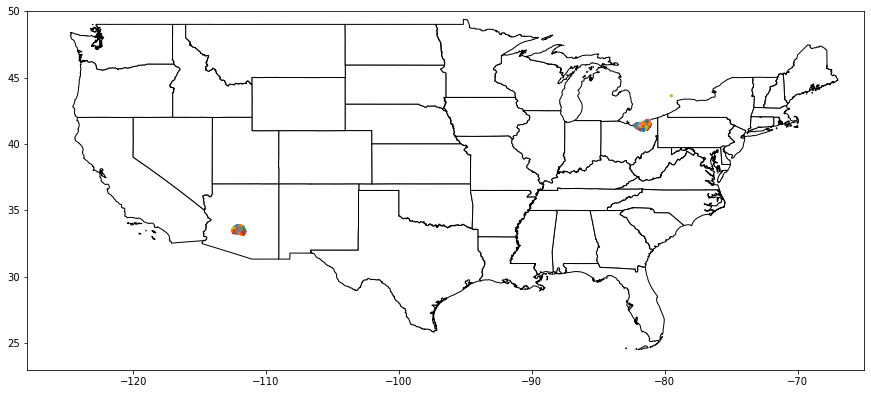

In [78]:
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long
fig, axs = plt.subplots(figsize= (15,15))

df.plot(ax = axs, color='white', edgecolor='black')
plt.xlim(x_lim)
plt.ylim(y_lim)
yelp.plot(ax = axs,marker='o',  markersize=5, column = 'city')
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.show()

In [79]:
yelp['postal_code'] = yelp['postal_code'].replace('', np.nan)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer

In [81]:
df_comp = yelp.copy()

In [82]:
df_comp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12927 entries, 9 to 65605
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   business_id       12927 non-null  object  
 1   name              12927 non-null  object  
 2   address           12927 non-null  object  
 3   city              12927 non-null  object  
 4   state             12927 non-null  object  
 5   postal_code       12916 non-null  object  
 6   latitude          12927 non-null  float64 
 7   longitude         12927 non-null  float64 
 8   review_count      12927 non-null  int64   
 9   is_open           12927 non-null  int64   
 10  stars_avg         12927 non-null  float64 
 11  categories_fixed  12927 non-null  object  
 12  food_type         12927 non-null  object  
 13  ethnicity         12927 non-null  object  
 14  venue             12927 non-null  object  
 15  food_comb         12927 non-null  object  
 16  geometry      

In [83]:
# df_comp['text length'] = df_comp['text'].apply(len)
# g = sns.FacetGrid(data=df_comp, col='stars_avg')
# g.map(plt.hist, 'text length', bins=50)

In [84]:
df_comp.isnull().sum()

business_id          0
name                 0
address              0
city                 0
state                0
postal_code         11
latitude             0
longitude            0
review_count         0
is_open              0
stars_avg            0
categories_fixed     0
food_type            0
ethnicity            0
venue                0
food_comb            0
geometry             0
dtype: int64

In [85]:
df_comp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12927 entries, 9 to 65605
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   business_id       12927 non-null  object  
 1   name              12927 non-null  object  
 2   address           12927 non-null  object  
 3   city              12927 non-null  object  
 4   state             12927 non-null  object  
 5   postal_code       12916 non-null  object  
 6   latitude          12927 non-null  float64 
 7   longitude         12927 non-null  float64 
 8   review_count      12927 non-null  int64   
 9   is_open           12927 non-null  int64   
 10  stars_avg         12927 non-null  float64 
 11  categories_fixed  12927 non-null  object  
 12  food_type         12927 non-null  object  
 13  ethnicity         12927 non-null  object  
 14  venue             12927 non-null  object  
 15  food_comb         12927 non-null  object  
 16  geometry      

In [86]:
df_comp.state.unique()

array(['AZ', 'OH'], dtype=object)

In [87]:
df_comp[df_comp['state'].isin(['OH', 'PA', 'NV', 'AZ', 'NC', 'WI', 'IL'])==True]

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,stars_avg,categories_fixed,food_type,ethnicity,venue,food_comb,geometry
9,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,10,1,3.0,"Food, Pretzels, Bakeries, FastFood, Restaurants","Bakeries, Pretzels, FastFood",Undefined,Restaurant,"Bakeries, Pretzels, FastFood, Restaurant",POINT (-111.98353 33.60282)
12,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,23,1,4.0,"Restaurants, Vietnamese, Soup",Soup,Vietnamese,Restaurant,"Soup, Vietnamese, Restaurant",POINT (-81.66333 41.51216)
13,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,7,1,3.0,"Restaurants, FastFood, Burgers","Burgers, FastFood",Undefined,Restaurant,"Burgers, FastFood, Restaurant",POINT (-81.52703 41.43461)
15,lK-wuiq8b1TuU7bfbQZgsg,Hingetown,,Cleveland,OH,44113,41.489343,-81.711029,4,1,5.0,"ShoppingCenters, Food, Coffee&Tea, Cafes, Muse...",Undefined,Undefined,"Coffee&Tea, Cafes","Coffee&Tea, Cafes",POINT (-81.71103 41.48934)
18,LAoSegVNU4wx4GTA8reB6A,Tzikii Food Truck,7510 S Priest Dr,Tempe,AZ,85283,33.350104,-111.963660,4,1,3.0,"Restaurants, Egyptian, FoodTrucks, Food, Middl...",Undefined,"MiddleEastern, Egyptian",FoodTrucks,"MiddleEastern, Egyptian, FoodTrucks",POINT (-111.96366 33.35010)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65588,8dK-8e006F_it5bNxTVlaQ,Famous Dave's Bar-B-Que,26410 Great Northern Shopping Ctr,North Olmsted,OH,44070,41.418407,-81.915597,120,1,4.0,"Restaurants, Barbeque, ComfortFood, Salad, Eve...","Burgers, ComfortFood, Salad, Sandwiches","American(Traditional), Barbeque",Restaurant,"Burgers, ComfortFood, Salad, Sandwiches, Ameri...",POINT (-81.91560 41.41841)
65596,_bvc2j6E8mk_ZiMoh2iMuQ,Sonic Drive-In,6501 W Glendale Ave,Glendale,AZ,85301,33.537861,-112.199338,13,1,2.0,"IceCream&FrozenYogurt, Burgers, Restaurants, F...","IceCream&FrozenYogurt, Burgers, FastFood",American(Traditional),Restaurant,"IceCream&FrozenYogurt, Burgers, FastFood, Amer...",POINT (-112.19934 33.53786)
65600,cmsAFAymfVoBitSF8R6GKw,Yao Fine Chinese Cuisine,"2487 S Gilbert Rd, Ste 102",Gilbert,AZ,85295,33.304935,-111.788861,230,1,4.0,"Chinese, Restaurants",Undefined,Chinese,Restaurant,"Chinese, Restaurant",POINT (-111.78886 33.30494)
65602,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,-112.221142,106,1,2.0,"Nightlife, American(Traditional), ChickenWings...",ChickenWings,American(Traditional),Restaurant,"ChickenWings, American(Traditional), Restaurant",POINT (-112.22114 33.47914)


In [88]:
#df_comp_3yrs = df_comp[(df_comp['year'].isin([2019, 2018, 2017])) & (df_comp['state'].isin(['ON','AB', 'QC', 'MB'])==False)]


In [89]:
census = pd.read_csv('/Users/robholmstrom/Downloads/zipcode2017/17zpallagi.csv')
census = census.loc[census['zipcode']>0]
census.rename(columns={'zipcode':'postal_code'}, inplace = True)
census.postal_code= census.postal_code.astype('str').str.strip()


In [90]:
census

,STATEFIPS,STATE,postal_code,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
6,1,AL,35004,1,1500.0,970.0,220.0,290.0,1340.0,80.0,...,0.0,0.0,120.0,126.0,1300.0,2800.0,1290.0,2768.0,0.0,0.0
7,1,AL,35004,2,1340.0,670.0,350.0,280.0,1210.0,80.0,...,0.0,0.0,210.0,266.0,1130.0,2892.0,1120.0,2880.0,0.0,0.0
8,1,AL,35004,3,920.0,330.0,430.0,140.0,850.0,40.0,...,0.0,0.0,190.0,377.0,730.0,2012.0,720.0,1985.0,40.0,46.0
9,1,AL,35004,4,650.0,110.0,480.0,50.0,600.0,30.0,...,0.0,0.0,160.0,402.0,490.0,1480.0,480.0,1471.0,0.0,0.0
10,1,AL,35004,5,650.0,60.0,570.0,20.0,600.0,40.0,...,0.0,0.0,250.0,950.0,410.0,1514.0,410.0,1602.0,30.0,262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166532,56,WY,99999,2,3630.0,2040.0,1030.0,440.0,3240.0,160.0,...,0.0,0.0,550.0,889.0,2960.0,7332.0,2890.0,7127.0,60.0,70.0
166533,56,WY,99999,3,2470.0,1020.0,1220.0,200.0,2230.0,120.0,...,0.0,0.0,570.0,1258.0,1810.0,5299.0,1740.0,5020.0,70.0,164.0
166534,56,WY,99999,4,1820.0,520.0,1200.0,100.0,1680.0,80.0,...,0.0,0.0,440.0,1644.0,1300.0,4643.0,1250.0,4069.0,50.0,197.0
166535,56,WY,99999,5,2480.0,390.0,2020.0,80.0,2290.0,130.0,...,0.0,0.0,820.0,4527.0,1570.0,7633.0,1410.0,6069.0,170.0,1189.0


In [91]:
census['weighted_stub'] = census['agi_stub']*census['N1']
test_num = census['N1'].head(6)
test_stub = census['weighted_stub'].head(6)

In [92]:
census[census['postal_code'] == '35004']

,STATEFIPS,STATE,postal_code,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000,weighted_stub
6,1,AL,35004,1,1500.0,970.0,220.0,290.0,1340.0,80.0,...,0.0,120.0,126.0,1300.0,2800.0,1290.0,2768.0,0.0,0.0,1500.0
7,1,AL,35004,2,1340.0,670.0,350.0,280.0,1210.0,80.0,...,0.0,210.0,266.0,1130.0,2892.0,1120.0,2880.0,0.0,0.0,2680.0
8,1,AL,35004,3,920.0,330.0,430.0,140.0,850.0,40.0,...,0.0,190.0,377.0,730.0,2012.0,720.0,1985.0,40.0,46.0,2760.0
9,1,AL,35004,4,650.0,110.0,480.0,50.0,600.0,30.0,...,0.0,160.0,402.0,490.0,1480.0,480.0,1471.0,0.0,0.0,2600.0
10,1,AL,35004,5,650.0,60.0,570.0,20.0,600.0,40.0,...,0.0,250.0,950.0,410.0,1514.0,410.0,1602.0,30.0,262.0,3250.0
11,1,AL,35004,6,70.0,0.0,70.0,0.0,60.0,0.0,...,32.0,40.0,572.0,30.0,350.0,0.0,0.0,0.0,0.0,420.0


In [93]:
census_mean = census.groupby('postal_code')[['weighted_stub', 'N1']].sum().reset_index()
census_mean['agi_mean'] = census_mean['weighted_stub']/census_mean['N1']
census_mean[census_mean['postal_code'] == '35004']

,postal_code,weighted_stub,N1,agi_mean
8001,35004,13210.0,5130.0,2.575049


In [94]:
test_stub.sum()/test_num.sum()

2.5750487329434697

In [95]:
df_census = df_comp.merge(census_mean[['postal_code','agi_mean']], how = 'left', on = 'postal_code').dropna()
df_census

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,stars_avg,categories_fixed,food_type,ethnicity,venue,food_comb,geometry,agi_mean
0,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,10,1,3.0,"Food, Pretzels, Bakeries, FastFood, Restaurants","Bakeries, Pretzels, FastFood",Undefined,Restaurant,"Bakeries, Pretzels, FastFood, Restaurant",POINT (-111.98353 33.60282),2.418515
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,23,1,4.0,"Restaurants, Vietnamese, Soup",Soup,Vietnamese,Restaurant,"Soup, Vietnamese, Restaurant",POINT (-81.66333 41.51216),2.432432
2,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,7,1,3.0,"Restaurants, FastFood, Burgers","Burgers, FastFood",Undefined,Restaurant,"Burgers, FastFood, Restaurant",POINT (-81.52703 41.43461),1.746345
3,lK-wuiq8b1TuU7bfbQZgsg,Hingetown,,Cleveland,OH,44113,41.489343,-81.711029,4,1,5.0,"ShoppingCenters, Food, Coffee&Tea, Cafes, Muse...",Undefined,Undefined,"Coffee&Tea, Cafes","Coffee&Tea, Cafes",POINT (-81.71103 41.48934),2.575374
4,LAoSegVNU4wx4GTA8reB6A,Tzikii Food Truck,7510 S Priest Dr,Tempe,AZ,85283,33.350104,-111.963660,4,1,3.0,"Restaurants, Egyptian, FoodTrucks, Food, Middl...",Undefined,"MiddleEastern, Egyptian",FoodTrucks,"MiddleEastern, Egyptian, FoodTrucks",POINT (-111.96366 33.35010),2.447043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12922,8dK-8e006F_it5bNxTVlaQ,Famous Dave's Bar-B-Que,26410 Great Northern Shopping Ctr,North Olmsted,OH,44070,41.418407,-81.915597,120,1,4.0,"Restaurants, Barbeque, ComfortFood, Salad, Eve...","Burgers, ComfortFood, Salad, Sandwiches","American(Traditional), Barbeque",Restaurant,"Burgers, ComfortFood, Salad, Sandwiches, Ameri...",POINT (-81.91560 41.41841),2.529547
12923,_bvc2j6E8mk_ZiMoh2iMuQ,Sonic Drive-In,6501 W Glendale Ave,Glendale,AZ,85301,33.537861,-112.199338,13,1,2.0,"IceCream&FrozenYogurt, Burgers, Restaurants, F...","IceCream&FrozenYogurt, Burgers, FastFood",American(Traditional),Restaurant,"IceCream&FrozenYogurt, Burgers, FastFood, Amer...",POINT (-112.19934 33.53786),1.654197
12924,cmsAFAymfVoBitSF8R6GKw,Yao Fine Chinese Cuisine,"2487 S Gilbert Rd, Ste 102",Gilbert,AZ,85295,33.304935,-111.788861,230,1,4.0,"Chinese, Restaurants",Undefined,Chinese,Restaurant,"Chinese, Restaurant",POINT (-111.78886 33.30494),3.039604
12925,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,-112.221142,106,1,2.0,"Nightlife, American(Traditional), ChickenWings...",ChickenWings,American(Traditional),Restaurant,"ChickenWings, American(Traditional), Restaurant",POINT (-112.22114 33.47914),1.673186


In [96]:
df_census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12838 entries, 0 to 12926
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   business_id       12838 non-null  object  
 1   name              12838 non-null  object  
 2   address           12838 non-null  object  
 3   city              12838 non-null  object  
 4   state             12838 non-null  object  
 5   postal_code       12838 non-null  object  
 6   latitude          12838 non-null  float64 
 7   longitude         12838 non-null  float64 
 8   review_count      12838 non-null  int64   
 9   is_open           12838 non-null  int64   
 10  stars_avg         12838 non-null  float64 
 11  categories_fixed  12838 non-null  object  
 12  food_type         12838 non-null  object  
 13  ethnicity         12838 non-null  object  
 14  venue             12838 non-null  object  
 15  food_comb         12838 non-null  object  
 16  geometry      

In [97]:
df_census[df_census['state']=='OH']['agi_mean']

1        2.432432
2        1.746345
3        2.575374
5        2.858832
9        2.279412
           ...   
12903    2.912805
12909    1.935484
12910    2.032440
12913    2.031456
12922    2.529547
Name: agi_mean, Length: 4444, dtype: float64

In [98]:
df_census = df_census.dropna()


In [99]:
df_census.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,stars_avg,categories_fixed,food_type,ethnicity,venue,food_comb,geometry,agi_mean
0,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,10,1,3.0,"Food, Pretzels, Bakeries, FastFood, Restaurants","Bakeries, Pretzels, FastFood",Undefined,Restaurant,"Bakeries, Pretzels, FastFood, Restaurant",POINT (-111.98353 33.60282),2.418515
1,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,23,1,4.0,"Restaurants, Vietnamese, Soup",Soup,Vietnamese,Restaurant,"Soup, Vietnamese, Restaurant",POINT (-81.66333 41.51216),2.432432
2,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,7,1,3.0,"Restaurants, FastFood, Burgers","Burgers, FastFood",Undefined,Restaurant,"Burgers, FastFood, Restaurant",POINT (-81.52703 41.43461),1.746345
3,lK-wuiq8b1TuU7bfbQZgsg,Hingetown,,Cleveland,OH,44113,41.489343,-81.711029,4,1,5.0,"ShoppingCenters, Food, Coffee&Tea, Cafes, Muse...",Undefined,Undefined,"Coffee&Tea, Cafes","Coffee&Tea, Cafes",POINT (-81.71103 41.48934),2.575374
4,LAoSegVNU4wx4GTA8reB6A,Tzikii Food Truck,7510 S Priest Dr,Tempe,AZ,85283,33.350104,-111.963660,4,1,3.0,"Restaurants, Egyptian, FoodTrucks, Food, Middl...",Undefined,"MiddleEastern, Egyptian",FoodTrucks,"MiddleEastern, Egyptian, FoodTrucks",POINT (-111.96366 33.35010),2.447043


In [100]:
#df_census.to_csv(r'/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_census.csv', index = False)

In [102]:
df_census[df_census['ethnicity'].str.contains('Thai')]['agi_mean'].mean()

2.777341697152309

In [239]:
df_census[df_census['ethnicity'].str.contains('Mexican')]['agi_mean'].mean()

2.4436418752235443

(array([  13.,  495., 1554., 1734., 2660., 3262., 1612., 1093.,  222.,
         193.]),
 array([1.09756098, 1.40074194, 1.70392291, 2.00710387, 2.31028484,
        2.6134658 , 2.91664677, 3.21982773, 3.5230087 , 3.82618966,
        4.12937063]),
 <a list of 10 Patch objects>)

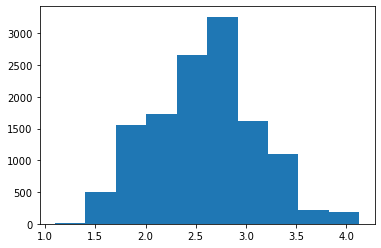

In [104]:
plt.hist(df_census['agi_mean'])

In [105]:
df_census.loc[df_census['agi_mean']>3.5]['venue'].value_counts()

Restaurant                                              268
Coffee&Tea                                               44
Steakhouses                                              17
SushiBars                                                12
Cafes                                                    12
Delis                                                    10
Diners                                                   10
FoodDeliveryServices                                      5
Coffee&Tea, CoffeeRoasteries                              4
Gastropubs                                                4
Coffee&Tea, Cafes                                         4
FoodTrucks                                                3
FoodDeliveryServices, Delis                               3
Grocery                                                   3
TapasBars                                                 3
Coffee&Tea, ConvenienceStores, Grocery                    2
Coffee&Tea, ConvenienceStores           

In [106]:
df_census.loc[df_census['agi_mean']<2][['postal_code', 'agi_mean']].sort_values(['agi_mean'])

,postal_code,agi_mean
7939,85309,1.097561
7034,44104,1.373547
5267,44104,1.373547
5786,44104,1.373547
6534,44104,1.373547
...,...,...
3197,85303,1.994113
850,85303,1.994113
7912,85303,1.994113
11766,85303,1.994113


In [108]:
df_census = df_census.reset_index(drop= True)

In [109]:
df_census.columns.tolist()

['business_id',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'review_count',
 'is_open',
 'stars_avg',
 'categories_fixed',
 'food_type',
 'ethnicity',
 'venue',
 'food_comb',
 'geometry',
 'agi_mean']

In [125]:
vectorizer = CountVectorizer(analyzer='word', min_df=100, max_features=50)
Xvec = vectorizer.fit_transform(df_census['food_comb'])
bow_df = pd.DataFrame(Xvec.toarray(), columns=vectorizer.get_feature_names())


In [223]:

# bow_df = pd.DataFrame()
# vectorizer = CountVectorizer(analyzer='word')
# X = vectorizer.fit_transform(df_census['categories_fixed'])
# bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
# df_vec = pd.concat([bow_df, df_census], axis=1, ignore_index= True)
df_vec = pd.concat([bow_df, df_census[['stars_avg']]], axis=1)


In [224]:
df_vec = df_vec[(df_vec != 0).any(axis=1)]
df_vec = df_vec.loc[:, (df_vec != 0).any(axis=0)]

In [225]:
X = df_vec
y = df_census['state']


In [226]:
y.value_counts()

AZ    8394
OH    4444
Name: state, dtype: int64

In [227]:

le_train = LabelEncoder()
y_le = le_train.fit_transform(y)



print(y_le)

[0 1 1 ... 0 0 0]


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, stratify = y_le, random_state = 42)

In [229]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


In [230]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# df_vec = df_vec.select_dtypes(include = numerics).dropna()

In [231]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [232]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [233]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [234]:
y_pred_test = lr.predict(X_test_scaled)

In [235]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,log_loss, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('LR1 confusion matrix')
#lr1train = confusion_matrix(y_train, y_pred_train, normalize= None)
lr1test = confusion_matrix(y_test, y_pred_test, normalize = None)
lr1test

LR1 confusion matrix


array([[1043, 1056],
       [ 369,  742]])

In [236]:
print('Test macro average recall score is ',recall_score(y_test, y_pred_test, average = 'macro'))

Test macro average recall score is  0.5823850369791624


In [237]:
knn1 = KNeighborsClassifier(n_neighbors=15, weights='uniform', leaf_size=20)
knn1.fit(X_train_scaled, y_train)

y_test_predknn1 = knn1.predict(X_test_scaled)
y_train_predknn1 = knn1.predict(X_train_scaled)
print('Test macro average recall score is ',recall_score(y_test, y_test_predknn1,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train, y_train_predknn1,average = 'macro'))


Test macro average recall score is  0.606212550745308
Train macro average recall score is  0.6625099285146943


In [238]:
print('Test accuracy score is ',accuracy_score(y_test, y_test_predknn1))
print('Train accuracy score is ',accuracy_score(y_train, y_train_predknn1))


Test accuracy score is  0.6448598130841121
Train accuracy score is  0.6625099285146941


In [203]:

pca = PCA(n_components = 10)
pcafit = pca.fit_transform(X_train_scaled)

In [204]:
pcafit

array([[ 0.43575422, -0.10234707, -0.29685216, ...,  0.07778293,
        -0.15778868,  0.0655847 ],
       [-0.55860352,  0.19842185, -0.47694867, ...,  0.72004353,
         0.57231547,  0.13789146],
       [-0.39673753,  1.24265406,  0.29219063, ..., -0.28597422,
        -0.29579771,  0.54782082],
       ...,
       [ 0.34263006, -0.17042298, -0.5066707 , ...,  0.14142686,
        -0.10265191,  0.19542517],
       [-0.44013757, -0.22448087, -0.12158792, ..., -0.08859305,
         0.3604144 ,  0.48417662],
       [ 0.40444871,  2.0169735 ,  0.07690496, ...,  0.37453427,
         0.22234005, -0.29144741]])

In [205]:
dfpca = pd.DataFrame(pcafit)

In [206]:
dfpca

,0,1,2,3,4,5,6,7,8,9
0,0.435754,-0.102347,-0.296852,0.059568,0.068645,-0.601053,0.402622,0.077783,-0.157789,0.065585
1,-0.558604,0.198422,-0.476949,0.337714,0.739539,0.100422,-0.426229,0.720044,0.572315,0.137891
2,-0.396738,1.242654,0.292191,0.249984,0.086478,1.102601,0.422171,-0.285974,-0.295798,0.547821
3,0.417460,-0.140997,-0.320154,-0.107829,-0.064853,-0.527881,0.514789,0.116491,-0.345337,-0.048285
4,-0.348570,-0.243916,-0.200672,-0.126263,-0.252656,-0.075732,-0.221482,-0.036159,-0.511113,-0.424124
...,...,...,...,...,...,...,...,...,...,...
12586,0.445424,1.269067,0.875991,0.343203,-0.050117,0.083349,0.835046,-0.356056,-0.070039,-0.577512
12587,-0.554693,-0.387555,-0.667133,0.151255,0.218890,0.665423,0.375216,0.079043,0.084022,0.161981
12588,0.342630,-0.170423,-0.506671,0.022990,0.078903,-0.240774,0.574842,0.141427,-0.102652,0.195425
12589,-0.440138,-0.224481,-0.121588,0.193552,-0.623857,-0.261974,-0.270971,-0.088593,0.360414,0.484177


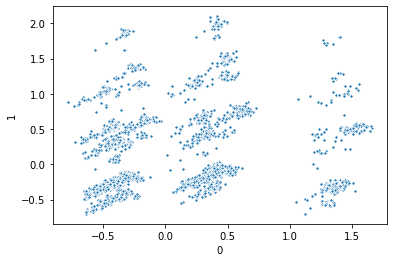

In [208]:
sns.scatterplot(dfpca[0], dfpca[1], s = 10)

In [209]:
uppca = umap.UMAP(n_neighbors=50,
                      min_dist=.3,
                      metric='correlation').fit_transform(dfpca)


/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


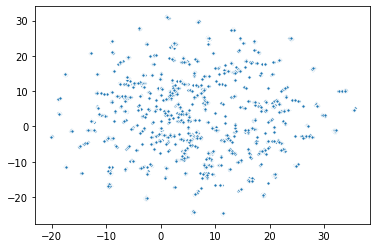

In [210]:
sns.scatterplot(uppca[:,0], uppca[:,1], s = 10)

In [211]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(dfpca)
pcagmmlabels = gmm.predict(dfpca)


In [ ]:
sns.scatterplot(dfpca[0], dfpca[1], s = 10)

In [ ]:
df_labeled = pd.concat([pd.Series(pcagmmlabels), df_vec], axis = 1).rename(columns = {0:'gmmlabels'})

In [ ]:
df_labeled.info()

In [ ]:
df_labeled.groupby('gmmlabels').mean()

In [ ]:
df_vec.info()

In [ ]:
df_vec.head()

In [2294]:

up = umap.UMAP(n_neighbors=20,
                      min_dist=.5,
                      metric='euclidean').fit_transform(df_vec_scaled_ws)


In [2295]:
up.shape

(12838, 2)

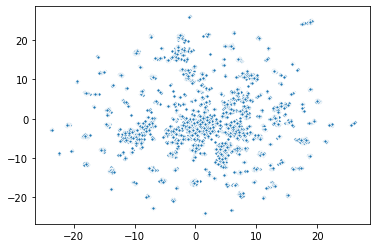

In [2296]:
sns.scatterplot(up[:,0], up[:,1], s = 10)

In [2297]:
km = KMeans(n_clusters = 6)
km.fit_transform(up)
upkmlabels = km.labels_

In [2298]:
df_labeled = pd.concat([pd.Series(upkmlabels), df_labeled], axis = 1).rename(columns = {0:'upkmlabels'})

In [2299]:
df_labeled.shape

(12838, 54)

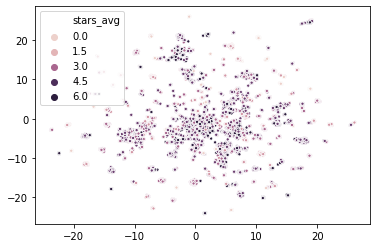

In [2300]:
sns.scatterplot(up[:,0], up[:,1], s = 10, hue = df_labeled['stars_avg'])

In [2259]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [1808]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [1809]:
analyzer = SentimentIntensityAnalyzer()



In [2269]:
df_rev_cens = df2_3yrs.merge(df_census, on = 'business_id', how = 'inner')


In [2262]:
df_rev_cens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759454 entries, 0 to 759453
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   review_id         759454 non-null  object        
 1   user_id           759454 non-null  object        
 2   business_id       759454 non-null  object        
 3   stars             759454 non-null  int64         
 4   useful            759454 non-null  int64         
 5   funny             759454 non-null  int64         
 6   cool              759454 non-null  int64         
 7   text              759454 non-null  object        
 8   date              759454 non-null  datetime64[ns]
 9   text length       759454 non-null  int64         
 10  year              759454 non-null  int64         
 11  month             759454 non-null  object        
 12  weekday           759454 non-null  object        
 13  hour              759454 non-null  int64         
 14  name

In [2264]:
text = df_rev_cens.iloc[0]['text']

In [2265]:
analyzer.polarity_scores(text)

{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.9402}

In [2268]:
sentiment = []
for i, row in df_rev_cens.iterrows():
    data = analyzer.polarity_scores(row['text'])
    data['text'] = row['text']
  
    sentiment.append(data)


In [1813]:
sentiment

[{'neg': 0.028,
  'neu': 0.768,
  'pos': 0.204,
  'compound': 0.9887,
  'text': 'Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive thru is packed just like most of the other canes in the area but I like to go sit down to enjoy my chicken. The cashiers are pleasant and as far as food wise i have yet to receive any funky chicken. The clean up crew zips around the dining area constantly so it\'s usually well kept. My only gripe is the one fella with Red hair he makes the rounds while cleaning but no smile or personality a few nights ago he tossed the napkins i just put on the table to help go with my meal. After I was done he just reached for my tray no "excuse me or are you done with that?"  I realize he\'s trying to do his job quickly but a little table manners goes along way. That being said still like to grub here and glad that there\'s finally a Cane\'s close to me.'},
 {'neg': 0.0,
  'neu': 0.596,
  'pos': 0.404,
  'compound': 0.962,
  '

In [1814]:
pd.DataFrame(sentiment)

,neg,neu,pos,compound,text
0,0.028,0.768,0.204,0.9887,"Oh happy day, finally have a Canes near my cas..."
1,0.000,0.596,0.404,0.9620,"Awesome office and staff, very professional an..."
2,0.070,0.885,0.046,-0.5499,"If I could give less than one star, that would..."
3,0.029,0.819,0.152,0.9942,A close friend was in town and so instead of t...
4,0.082,0.918,0.000,-0.8326,Tried to have my car repaired. Even made an a...
5,0.032,0.811,0.157,0.9651,My husband and I go there once a week since la...
6,0.000,0.497,0.503,0.9648,Holy heck this place is amazing. I love their ...
7,0.000,0.567,0.433,0.9642,I love the classes at this gym. Zumba and. Rad...
8,0.030,0.767,0.204,0.9942,"In the heart of Chinatown, I discovered it enr..."
9,0.000,0.639,0.361,0.9402,Always a fun outing to come for great hot dogs...
